<a href="https://colab.research.google.com/github/selychan/LstmModelling/blob/main/LSTM_XGBOOST_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
import tensorflow as tf

In [4]:
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import LabelEncoder

In [17]:
import numpy as np

In [5]:
test_data = pd.read_csv('/content/labelled_testing_data.csv', sep=';', quoting=csv.QUOTE_NONE)
test_data #test datasını hazırladık

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050.634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0.0,0.0
1,129.051.238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0.0,0.0
2,129.051.434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0.0,0.0
3,129.051.481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0.0,0.0
4,129.051.522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50303,461.717.321,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"""[{'name': 'sockfd', 'type': 'int', 'value': 5...",1.0,1.0
50304,461.717.348,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"""[{'name': 'sockfd', 'type': 'int', 'value': 5...",1.0,1.0
50305,461.717.372,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"""[{'name': 'sockfd', 'type': 'int', 'value': 5...",1.0,1.0
50306,461.717.394,7555,7555,7548,1001,4026531840,tsm,ip-10-100-1-217,42,connect,[],3,-114,"""[{'name': 'sockfd', 'type': 'int', 'value': 5...",1.0,1.0


In [6]:
label_encoder = LabelEncoder()

In [7]:
test_data['hostname_encoded'] = label_encoder.fit_transform(test_data['hostName'])


In [8]:
test_data['timestamp_encoded'] = label_encoder.fit_transform(test_data['timestamp'])


In [9]:
test_data.drop('hostName', axis=1, inplace=True)


In [10]:
test_data.drop('timestamp', axis=1, inplace=True)

In [11]:
test_data.drop('mountNamespace', axis=1, inplace=True)

In [12]:
test_data = test_data.drop([ 'processName', 'eventName', 'stackAddresses', 'args'], axis=1)

In [13]:
test_data

,processId,threadId,parentProcessId,userId,eventId,argsNum,returnValue,sus,evil,hostname_encoded,timestamp_encoded
0,382,382,1,101,41,3,15,0.0,0.0,0,37
1,379,379,1,100,41,3,15,0.0,0.0,0,38
2,1,1,0,0,1005,4,0,0.0,0.0,0,39
3,1,1,0,0,257,4,17,0.0,0.0,0,40
4,1,1,0,0,5,2,0,0.0,0.0,0,41
...,...,...,...,...,...,...,...,...,...,...,...
50303,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50303
50304,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50304
50305,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50305
50306,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50306


In [14]:
test_data = test_data.dropna()

In [15]:
test_data

,processId,threadId,parentProcessId,userId,eventId,argsNum,returnValue,sus,evil,hostname_encoded,timestamp_encoded
0,382,382,1,101,41,3,15,0.0,0.0,0,37
1,379,379,1,100,41,3,15,0.0,0.0,0,38
2,1,1,0,0,1005,4,0,0.0,0.0,0,39
3,1,1,0,0,257,4,17,0.0,0.0,0,40
4,1,1,0,0,5,2,0,0.0,0.0,0,41
...,...,...,...,...,...,...,...,...,...,...,...
50302,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50302
50303,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50303
50304,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50304
50305,7555,7555,7548,1001,42,3,-114,1.0,1.0,0,50305


In [16]:
X = test_data[['processId', 'eventId','hostname_encoded','argsNum','userId']] #5 adet bağımsız değişkenimiz mevcut
y = test_data[['evil']] #1 adet hedef değişkenimiz mevcut.  evil.

# Veriyi train ve test setlerine bölelim test %20 eğitim %80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

model = Sequential() #sıralı model oluşturduk.
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=5))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train['evil'], epochs=10, batch_size=32)
model.evaluate(X_test, y_test['evil'])


315/315 [==============================] - 2s 3ms/step - loss: 0.1150


0.11495120823383331

In [22]:

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


315/315 [==============================] - 2s 5ms/step
Accuracy: 0.8973365136155834


In [25]:

predictions = model.predict(X_test)
predictions = np.round(predictions)


315/315 [==============================] - 2s 6ms/step


In [26]:

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
print("f1 score:", f1)


f1 score: 0.8774178236620387


In [27]:


from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, predictions)

print(cm)


[[5332  808]
 [ 225 3697]]


In [28]:


from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions)
print("precision score:", precision) #precision = tp/(tp+fp)


precision score: 0.8206437291897891


<ipython-input-37-747f6a2db5a1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Set2')


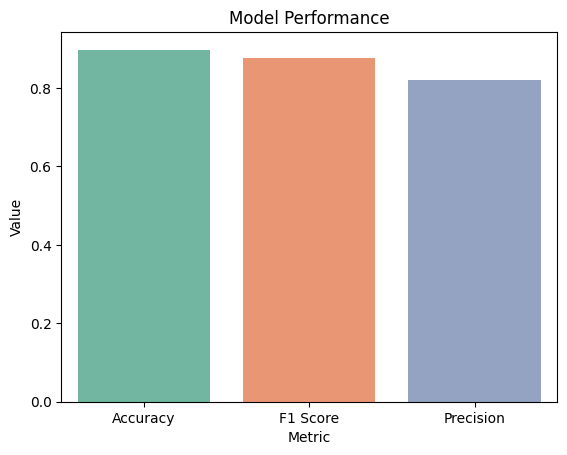

In [37]:

import seaborn as sns

# Create a list of metrics
metrics = ['Accuracy', 'F1 Score', 'Precision']

# Create a list of values for each metric
values = [accuracy, f1, precision]

# Create a bar chart
sns.barplot(x=metrics, y=values, palette='Set2')

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance')

# Show the plot
plt.show()


In [40]:
import xgboost as xgb

# XGBoost sınıflandırma modelini oluşturma ve parametrelerini ayarlama
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Ağaç sayısı
    max_depth=5,       # Ağaç derinliği
    learning_rate=0.1, # Öğrenme oranı
    objective='binary:logistic'  # Sınıflandırma için kullanılan objektif fonksiyon
)

# Modeli eğitme
xgb_model.fit(X_train, y_train['evil'])

# Modeli değerlendirme
accuracy = xgb_model.score(X_test, y_test['evil'])
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9959252633671238


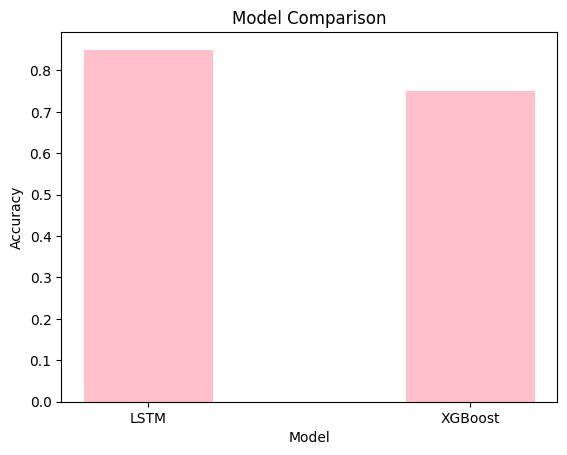

In [63]:


import matplotlib.pyplot as plt

# Create some data
lstm_accuracy = 0.85
xgboost_accuracy = 0.75

# Create a list of models and their corresponding accuracies
models = ['LSTM', 'XGBoost']
accuracies = [lstm_accuracy, xgboost_accuracy]

# Create a bar chart
plt.bar(models, accuracies, color='pink', width=0.4)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Show the plot
plt.show()
